# LASSO Regression

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

In [3]:
pd.set_option("display.max_columns", 500)

<IPython.core.display.Javascript object>

In [4]:
# Loading in the dataset
data = pd.read_csv("Data/data.csv", index_col=[0])
data

,state,county,area_sqmi,epl_pov,epl_unemp,epl_pci,epl_nohsdp,spl_theme1,rpl_theme1,epl_age65,epl_age17,epl_disabl,epl_sngpnt,spl_theme2,rpl_theme2,epl_minrty,epl_limeng,spl_theme3,rpl_theme3,epl_munit,epl_mobile,epl_crowd,epl_noveh,epl_groupq,spl_theme4,rpl_theme4,spl_themes,rpl_themes,f_pov,f_unemp,f_pci,f_nohsdp,f_theme1,f_age65,f_age17,f_disabl,f_sngpnt,f_theme2,f_minrty,f_limeng,f_theme3,f_munit,f_mobile,f_crowd,f_noveh,f_groupq,f_theme4,f_total
0,ALABAMA,Autauga,594.443459,0.5401,0.2745,0.2860,0.4397,1.5403,0.3631,0.1850,0.7529,0.7905,0.3792,2.1076,0.5810,0.6336,0.5113,1.1449,0.5947,0.6017,0.7408,0.2964,0.4846,0.1525,2.2760,0.3741,7.0688,0.4354,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ALABAMA,Baldwin,1589.793007,0.2239,0.3121,0.2057,0.3209,1.0626,0.2232,0.6428,0.4323,0.3524,0.1391,1.5666,0.1990,0.5158,0.3582,0.8740,0.4358,0.9713,0.5339,0.2604,0.1328,0.3018,2.2002,0.3359,5.7034,0.2162,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
2,ALABAMA,Barbour,885.001636,0.9631,0.9217,0.9481,0.9701,3.8030,0.9780,0.4893,0.3327,0.9064,0.9468,2.6752,0.9153,0.8965,0.7052,1.6017,0.8558,0.2416,0.9280,0.8198,0.8685,0.9449,3.8028,0.9889,11.8827,0.9959,1,1,1,1,4,0,0,1,1,2,0,0,0,0,1,0,0,1,2,8
3,ALABAMA,Bibb,622.461089,0.4430,0.7895,0.8987,0.7351,2.8663,0.7694,0.3200,0.2846,0.6074,0.1706,1.3826,0.1203,0.6390,0.2270,0.8660,0.4323,0.4317,0.9207,0.0981,0.5441,0.9214,2.9160,0.7189,8.0309,0.6003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2,2
4,ALABAMA,Blount,644.830460,0.4723,0.2611,0.7561,0.8405,2.3300,0.6143,0.4715,0.6406,0.3763,0.2961,1.7845,0.3187,0.4206,0.7170,1.1376,0.5915,0.1512,0.8816,0.3703,0.2420,0.1165,1.7616,0.1741,7.0137,0.4242,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,WYOMING,Sweetwater,10426.975725,0.3127,0.4490,0.1497,0.2668,1.1782,0.2576,0.0293,0.9150,0.2041,0.7679,1.9163,0.4193,0.5680,0.7052,1.2732,0.6718,0.7307,0.8306,0.4817,0.0503,0.2582,2.3515,0.4120,6.7192,0.3701,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
3138,WYOMING,Teton,3996.844622,0.0522,0.0264,0.0051,0.0548,0.1385,0.0025,0.1334,0.1506,0.0060,0.2216,0.5116,0.0096,0.5400,0.9000,1.4400,0.7736,0.8109,0.1442,0.9688,0.0503,0.7561,2.7303,0.6266,4.8204,0.1127,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,2
3139,WYOMING,Uinta,2081.719807,0.3430,0.6032,0.4443,0.1347,1.5252,0.3583,0.0675,0.9685,0.6488,0.2665,1.9513,0.4486,0.4136,0.4642,0.8778,0.4390,0.7453,0.8816,0.7249,0.1971,0.2582,2.8071,0.6657,7.1614,0.4522,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
3140,WYOMING,Washakie,2238.672972,0.3360,0.6207,0.4035,0.3792,1.7394,0.4293,0.7380,0.7122,0.4448,0.2961,2.1911,0.6482,0.5330,0.2270,0.7600,0.3687,0.1958,0.5384,0.4457,0.3715,0.4995,2.0509,0.2751,6.7414,0.3732,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [31]:
# Creating dummy variables for binary data
df = pd.get_dummies(
    data,
    columns=[
        "f_pov",
        "f_unemp",
        "f_pci",
        "f_nohsdp",
        "f_age65",
        "f_age17",
        "f_disabl",
        "f_sngpnt",
        "f_minrty",
        "f_limeng",
        "f_munit",
        "f_mobile",
        "f_crowd",
        "f_noveh",
        "f_groupq",
    ],
)
df

,state,county,area_sqmi,epl_pov,epl_unemp,epl_pci,epl_nohsdp,spl_theme1,rpl_theme1,epl_age65,epl_age17,epl_disabl,epl_sngpnt,spl_theme2,rpl_theme2,epl_minrty,epl_limeng,spl_theme3,rpl_theme3,epl_munit,epl_mobile,epl_crowd,epl_noveh,epl_groupq,spl_theme4,rpl_theme4,spl_themes,rpl_themes,f_theme1,f_theme2,f_theme3,f_theme4,f_total,f_pov_0,f_pov_1,f_unemp_0,f_unemp_1,f_pci_0,f_pci_1,f_nohsdp_0,f_nohsdp_1,f_age65_0,f_age65_1,f_age17_0,f_age17_1,f_disabl_0,f_disabl_1,f_sngpnt_0,f_sngpnt_1,f_minrty_0,f_minrty_1,f_limeng_0,f_limeng_1,f_munit_0,f_munit_1,f_mobile_0,f_mobile_1,f_crowd_0,f_crowd_1,f_noveh_0,f_noveh_1,f_groupq_0,f_groupq_1
0,ALABAMA,Autauga,594.443459,0.5401,0.2745,0.2860,0.4397,1.5403,0.3631,0.1850,0.7529,0.7905,0.3792,2.1076,0.5810,0.6336,0.5113,1.1449,0.5947,0.6017,0.7408,0.2964,0.4846,0.1525,2.2760,0.3741,7.0688,0.4354,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
1,ALABAMA,Baldwin,1589.793007,0.2239,0.3121,0.2057,0.3209,1.0626,0.2232,0.6428,0.4323,0.3524,0.1391,1.5666,0.1990,0.5158,0.3582,0.8740,0.4358,0.9713,0.5339,0.2604,0.1328,0.3018,2.2002,0.3359,5.7034,0.2162,0,0,0,1,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0
2,ALABAMA,Barbour,885.001636,0.9631,0.9217,0.9481,0.9701,3.8030,0.9780,0.4893,0.3327,0.9064,0.9468,2.6752,0.9153,0.8965,0.7052,1.6017,0.8558,0.2416,0.9280,0.8198,0.8685,0.9449,3.8028,0.9889,11.8827,0.9959,4,2,0,2,8,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,1
3,ALABAMA,Bibb,622.461089,0.4430,0.7895,0.8987,0.7351,2.8663,0.7694,0.3200,0.2846,0.6074,0.1706,1.3826,0.1203,0.6390,0.2270,0.8660,0.4323,0.4317,0.9207,0.0981,0.5441,0.9214,2.9160,0.7189,8.0309,0.6003,0,0,0,2,2,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1
4,ALABAMA,Blount,644.830460,0.4723,0.2611,0.7561,0.8405,2.3300,0.6143,0.4715,0.6406,0.3763,0.2961,1.7845,0.3187,0.4206,0.7170,1.1376,0.5915,0.1512,0.8816,0.3703,0.2420,0.1165,1.7616,0.1741,7.0137,0.4242,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,WYOMING,Sweetwater,10426.975725,0.3127,0.4490,0.1497,0.2668,1.1782,0.2576,0.0293,0.9150,0.2041,0.7679,1.9163,0.4193,0.5680,0.7052,1.2732,0.6718,0.7307,0.8306,0.4817,0.0503,0.2582,2.3515,0.4120,6.7192,0.3701,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
3138,WYOMING,Teton,3996.844622,0.0522,0.0264,0.0051,0.0548,0.1385,0.0025,0.1334,0.1506,0.0060,0.2216,0.5116,0.0096,0.5400,0.9000,1.4400,0.7736,0.8109,0.1442,0.9688,0.0503,0.7561,2.7303,0.6266,4.8204,0.1127,0,0,1,1,2,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0
3139,WYOMING,Uinta,2081.719807,0.3430,0.6032,0.4443,0.1347,1.5252,0.3583,0.0675,0.9685,0.6488,0.2665,1.9513,0.4486,0.4136,0.4642,0.8778,0.4390,0.7453,0.8816,0.7249,0.1971,0.2582,2.8071,0.6657,7.1614,0.4522,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
3140,WYOMING,Washakie,2238.672972,0.3360,0.6207,0.4035,0.3792,1.7394,0.4293,0.7380,0.7122,0.4448,0.2961,2.1911,0.6482,0.5330,0.2270,0.7600,0.3687,0.1958,0.5384,0.4457,0.3715,0.4995,2.0509,0.2751,6.7414,0.3732,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


<IPython.core.display.Javascript object>

In [32]:
# Preparing X and Y
y = df["rpl_themes"]
X_numerical = df.iloc[:, 2:28]
X_numerical = X_numerical.drop("rpl_themes", 1)
list_numerical = X_numerical.columns
X = df.drop(["state", "county", "rpl_themes"], 1)

<IPython.core.display.Javascript object>

In [34]:
# Lasso Regression
warnings.filterwarnings("ignore")  # Warnings about using iloc

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Standardize Values
scaler = StandardScaler().fit(X_train[list_numerical])
X_train[list_numerical] = scaler.transform(X_train[list_numerical])
X_test[list_numerical] = scaler.transform(X_test[list_numerical])

# Fitting LASSO Model
reg = Lasso(alpha=0.5)
reg.fit(X_train, y_train)

# Measures of Accuracy
print("R squared training set", round(reg.score(X_train, y_train), 2))
print("R squared test set", round(reg.score(X_test, y_test), 2))

# Training data
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print("MSE training set", round(mse_train, 2))

# Test data
pred = reg.predict(X_test)
mse_test = mean_squared_error(y_test, pred)
print("MSE test set", round(mse_test, 2))
X_train

R squared training set 0.0
R squared test set -0.0
MSE training set 0.08
MSE test set 0.08


,area_sqmi,epl_pov,epl_unemp,epl_pci,epl_nohsdp,spl_theme1,rpl_theme1,epl_age65,epl_age17,epl_disabl,epl_sngpnt,spl_theme2,rpl_theme2,epl_minrty,epl_limeng,spl_theme3,rpl_theme3,epl_munit,epl_mobile,epl_crowd,epl_noveh,epl_groupq,spl_theme4,rpl_theme4,spl_themes,f_theme1,f_theme2,f_theme3,f_theme4,f_total,f_pov_0,f_pov_1,f_unemp_0,f_unemp_1,f_pci_0,f_pci_1,f_nohsdp_0,f_nohsdp_1,f_age65_0,f_age65_1,f_age17_0,f_age17_1,f_disabl_0,f_disabl_1,f_sngpnt_0,f_sngpnt_1,f_minrty_0,f_minrty_1,f_limeng_0,f_limeng_1,f_munit_0,f_munit_1,f_mobile_0,f_mobile_1,f_crowd_0,f_crowd_1,f_noveh_0,f_noveh_1,f_groupq_0,f_groupq_1
1047,-0.203542,1.649138,1.525144,1.606039,1.589214,1.861921,1.670456,-0.655136,0.224020,1.707410,0.042602,0.727287,0.948021,-1.697804,-1.572492,-1.845136,-1.710390,-0.824701,1.270515,-1.117408,1.094733,-1.359658,-0.410229,-0.598797,0.486427,4,1,0,0,5,0,1,0,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
2071,-0.186306,-0.589406,0.023592,-1.382110,-1.349108,-0.964780,-0.994178,-0.619827,-0.720881,-0.870767,0.042602,-1.199118,-1.342777,0.015099,-0.035903,-0.012310,-0.012661,1.224727,-1.588769,-1.117408,-0.311868,1.149457,-0.259744,-0.411180,-0.880549,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
285,0.904253,-0.210395,-0.800661,-0.389729,-0.751855,-0.629749,-0.649100,-1.228393,1.344967,-1.207791,1.551821,0.255741,0.313213,0.186183,0.953512,0.651989,0.699859,1.231271,0.953397,0.830060,-0.438860,-0.934950,0.681359,0.806766,0.159896,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0
1164,-0.077340,-0.847368,0.187066,-1.343928,-0.558706,-0.749066,-0.765387,-0.754487,0.944110,-0.545892,0.452158,0.053869,-0.018611,0.288076,0.800912,0.620547,0.671483,0.929885,-0.416372,-0.381683,-1.180050,-1.281727,-0.978724,-1.104425,-0.531763,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
1307,-0.108805,-0.342135,0.698826,-0.720637,-0.640555,-0.294216,-0.297485,-0.129651,-0.450069,0.438800,0.105371,-0.020636,-0.129450,-0.656499,-0.821080,-0.836110,-0.854604,0.578899,-0.702161,-1.117408,0.463579,-1.048614,-0.770872,-0.941084,-0.634397,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2764,-0.060138,0.734201,-0.692940,-0.138968,1.048467,0.278743,0.316292,0.155938,1.361568,0.037565,1.128740,1.484403,1.531057,0.737300,1.471225,1.255118,1.292645,-1.303820,-0.074887,1.569886,-1.219843,-0.934950,-0.818583,-0.974029,0.567848,0,0,1,1,2,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0
905,-0.006936,0.114816,-0.329168,0.625698,-0.472748,-0.018593,-0.000574,-0.160460,0.758035,0.519324,0.985170,1.161676,1.326404,0.242982,0.761852,0.573097,0.604349,0.436300,-0.362068,-0.001005,0.222398,1.239640,0.649936,0.762723,0.665514,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
1096,-0.226590,1.436009,1.264274,1.488054,1.542297,1.675357,1.592701,0.347716,0.179750,0.768187,0.452158,0.965550,1.182555,-1.010715,0.344437,-0.361229,-0.387435,-0.949734,1.389913,1.274981,0.319286,-0.799506,0.510262,0.602503,1.160103,3,0,0,0,3,0,1,1,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
235,0.086330,0.322427,1.565754,0.291694,1.373120,1.039573,1.072160,-1.426747,1.509944,-0.786772,1.402702,0.387322,0.494586,1.447453,1.647989,1.750008,1.643196,0.991195,-1.057918,1.634130,0.366692,-1.159215,0.327778,0.360787,1.183402,1,1,2,1,5,1,0,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0,1,1,0,1,0


<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'LASSO Coefficients vs Regularization Parameters')

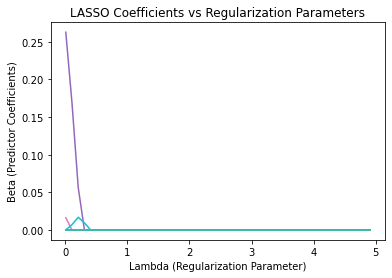

<IPython.core.display.Javascript object>

In [18]:
# Graph
coef = []
alphas = np.arange(0.01, 5, 0.10)
lasso = Lasso(max_iter=10000)

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coef.append(lasso.coef_)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(alphas, coef)
ax.set_xlabel("Lambda (Regularization Parameter)")
ax.set_ylabel("Beta (Predictor Coefficients)")
ax.set_title("LASSO Coefficients vs Regularization Parameters")

In [22]:
# K Fold Cross Validation
model = LassoCV(cv=10, random_state=1, max_iter=10000)
model.fit(X_train, y_train)
model.alpha_

0.0003471371986439612

<IPython.core.display.Javascript object>

In [30]:
coefs = np.array(model.coef_)
coefs

array([ 5.68495701e-04,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        6.96009057e-03,  0.00000000e+00,  1.48118370e-01,  5.15221407e-05,
        0.00000000e+00, -0.00000000e+00,  3.36108284e-03,  6.01869780e-02,
        6.83457782e-03,  6.47759728e-03,  0.00000000e+00,  0.00000000e+00,
        6.42972715e-02,  0.00000000e+00,  4.67030579e-04,  3.36965730e-03,
        0.00000000e+00, -1.08721120e-03,  3.94108512e-03,  8.86207721e-02,
        0.00000000e+00, -1.81538790e-03, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -1.84532998e-03,  2.16559785e-03, -1.62087259e-16,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -3.61615131e-03,  0.00000000e+00,
        4.88019535e-03, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -7.08816214e-03,  

<IPython.core.display.Javascript object>